In [1]:
import math
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# create graph

G = nx.DiGraph()

file = 'edge_list.txt'
reader = csv.reader(open(file, 'rt'), delimiter=' ')

for line in reader:
    G.add_edge(line[0], line[1], weight=int(line[2]))
    
print('Graf berhasil dibuat!')

Graf berhasil dibuat!


In [3]:
# returns the number of nodes, edges, and selfloop

nodes = nx.number_of_nodes(G)
edges = nx.number_of_edges(G)
selfloop = nx.number_of_selfloops(G)

print('Nodes: ', nodes)
print('Edges: ', edges)
print('Selfloop: ', selfloop)

Nodes:  12466
Edges:  20775
Selfloop:  0


In [4]:
list(nx.find_cycle(G, orientation="original"))

[('Somethinc4u', 'funskincare_', 'forward'),
 ('funskincare_', 'Somethinc4u', 'forward')]

In [6]:
"""
Density adalah ukuran
seberapa erat hubungan antar node dalam
suatu network
"""

nx.density(G)

0.00013369698914380448

# Strongly Connected Component

In [7]:
nx.is_strongly_connected(G)

False

In [8]:
# returns the number of strongly connected components

nx.number_strongly_connected_components(G)

11859

In [9]:
# generate a sorted list of strongly connected components

SCCs = [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
SCCs[:10]

[335, 9, 7, 4, 4, 4, 4, 3, 3, 3]

In [10]:
SCCs = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
SCC = G.subgraph(SCCs[0])

In [11]:
SCC

In [12]:
# returns the number of nodes, edges, and selfloop

nodes = nx.number_of_nodes(SCC)
edges = nx.number_of_edges(SCC)
selfloop = nx.number_of_selfloops(SCC)

print('Nodes: ', nodes)
print('Edges: ', edges)
print('Selfloop: ', selfloop)

Nodes:  335
Edges:  1570
Selfloop:  0


In [16]:
nx.find_cycle(SCC, source="Somethinc4u", orientation="original")

[('Somethinc4u', 'funskincare_', 'forward'),
 ('funskincare_', 'Somethinc4u', 'forward')]

In [17]:
nx.find_cycle(SCC, orientation="original")

[('JUALAN_BASE', 'itszgie', 'forward'), ('itszgie', 'JUALAN_BASE', 'forward')]

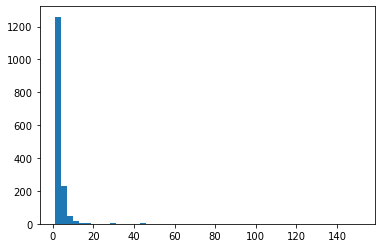

In [11]:
weights = [edata['weight'] for f, t, edata in SCC.edges(data=True)]
hist = plt.hist(weights, 50)

In [12]:
edge_list_scc = nx.to_pandas_edgelist(SCC)
edge_list_scc

,source,target,weight
0,squishybyunn2,Somethinc4u,12
1,squishybyunn2,sukaskincarean,6
2,squishybyunn2,msbb_id,4
3,pengenglowingg,Skincare_IDN,2
4,pengenglowingg,itszgie,2
...,...,...,...
1565,sleepinbeautea,glowupnrich,2
1566,sleepinbeautea,nanaskinjourney,1
1567,sleepinbeautea,cloudymilkyway,2
1568,sleepinbeautea,centellanii,2


In [13]:
edge_list_scc.to_csv('scc_edge_list.txt', sep=' ', index=False, header=False)

In [20]:
edge_list_scc.to_csv('scc_edge_list.csv', sep=',', index=False, header=False)

In [14]:
import operator

in_centrality = nx.eigenvector_centrality(SCC, weight='weight')
sorted(((v, f"{c:f}") for v,c in in_centrality.items()), key=operator.itemgetter(1), reverse=True)

[('JUALAN_BASE', '0.897784'),
 ('zfrabeautystuff', '0.331493'),
 ('Skincare_IDN', '0.161641'),
 ('guanlinsss', '0.140571'),
 ('markettfess', '0.134894'),
 ('Somethinc4u', '0.100706'),
 ('nalaapr', '0.044530'),
 ('itszgie', '0.042978'),
 ('JualanMenfess', '0.040883'),
 ('mafiaskincare', '0.031725'),
 ('meracauracaui', '0.031623'),
 ('sukaskincarean', '0.029300'),
 ('oapakpahan', '0.015919'),
 ('acnebutbetter', '0.014737'),
 ('glowithelle', '0.012093'),
 ('Drewand39360207', '0.010144'),
 ('naaazzzs', '0.008039'),
 ('avoskinbeauty', '0.007824'),
 ('lakijugaskinca1', '0.007755'),
 ('beautysavior8', '0.006399'),
 ('_munggahmudon8', '0.006220'),
 ('yoori__', '0.006070'),
 ('funskincare_', '0.006032'),
 ('skincharediary', '0.005925'),
 ('strawberrychez', '0.005402'),
 ('luluhusnaa', '0.005027'),
 ('ndasaurus', '0.004837'),
 ('domoodayo', '0.004777'),
 ('hippieshooray', '0.004220'),
 ('eoriin', '0.004169'),
 ('pengenglowingg', '0.004076'),
 ('dinikopi', '0.004061'),
 ('skincarecaca', '0.004016

In [17]:
import operator

pr_centrality = nx.pagerank_numpy(SCC, weight='weight')
sorted(((v, f"{c:f}") for v,c in pr_centrality.items()), key=operator.itemgetter(1), reverse=True)

[('Somethinc4u', '0.214652'),
 ('sukaskincarean', '0.048162'),
 ('Drewand39360207', '0.035890'),
 ('_munggahmudon8', '0.034698'),
 ('JUALAN_BASE', '0.025595'),
 ('lakijugaskinca1', '0.023847'),
 ('naaazzzs', '0.023838'),
 ('skincharediary', '0.022679'),
 ('yoori__', '0.022231'),
 ('luluhusnaa', '0.022119'),
 ('zfrabeautystuff', '0.021983'),
 ('ndasaurus', '0.019685'),
 ('funskincare_', '0.017750'),
 ('domoodayo', '0.017034'),
 ('glowithelle', '0.010881'),
 ('avoskinbeauty', '0.010867'),
 ('Skincare_IDN', '0.008611'),
 ('acnebutbetter', '0.007099'),
 ('Naimutss', '0.007069'),
 ('guanlinsss', '0.006643'),
 ('skincarecaca', '0.006628'),
 ('witheredrosee', '0.006606'),
 ('skingoldenhour', '0.006437'),
 ('strawberrychez', '0.006191'),
 ('tiaraadstya', '0.006054'),
 ('Jestersliem', '0.005598'),
 ('childishdancer', '0.005370'),
 ('nataadexoxo', '0.004723'),
 ('bulcindeh', '0.004631'),
 ('hippieshooray', '0.004624'),
 ('skinlatehunter', '0.004604'),
 ('TGIAmHot', '0.004597'),
 ('skinckel', '0.

In [22]:
SCC.reverse(copy=True)

In [67]:
file=open('centrality.csv', 'w')

writer=csv.writer(file)
for key, value in in_centrality.items():
    writer.writerow([key, value])
    
file.close()

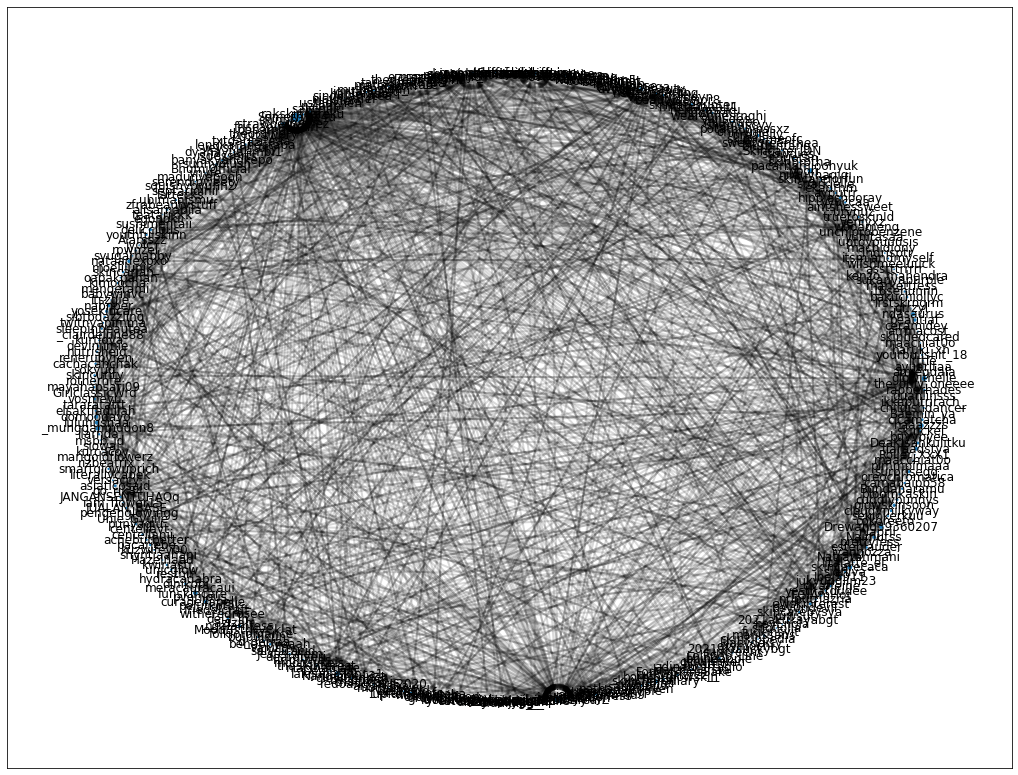

In [71]:
plt.subplots(figsize=(18,14))

K = 100
ce = nx.eigenvector_centrality_numpy(SCC)
ce = [ce[node]*K for node in SCC.nodes()]

pos = nx.shell_layout(SCC)
nx.draw_networkx_nodes(SCC, pos, node_size=ce)
nx.draw_networkx_edges(SCC, pos, width=2, alpha=0.15)
nx.draw_networkx_labels(SCC, pos)
plt.show()

In [19]:
SCC.edges(data=True)

OutEdgeDataView([('squishybyunn2', 'Somethinc4u', {'weight': 12}), ('squishybyunn2', 'sukaskincarean', {'weight': 6}), ('squishybyunn2', 'msbb_id', {'weight': 4}), ('pengenglowingg', 'Skincare_IDN', {'weight': 2}), ('pengenglowingg', 'itszgie', {'weight': 2}), ('pengenglowingg', 'JUALAN_BASE', {'weight': 1}), ('yyuccaa', 'sukaskincarean', {'weight': 9}), ('yyuccaa', 'Somethinc4u', {'weight': 8}), ('yyuccaa', 'nanaskinjourney', {'weight': 1}), ('yyuccaa', 'ngalamfess', {'weight': 2}), ('yyuccaa', 'skingoldenhour', {'weight': 5}), ('salichilic', 'yoori__', {'weight': 1}), ('salichilic', 'tiaraadstya', {'weight': 2}), ('salichilic', 'skinnedcared', {'weight': 2}), ('salichilic', 'sukaskincarean', {'weight': 3}), ('salichilic', 'Somethinc4u', {'weight': 1}), ('salichilic', 'skincarecaca', {'weight': 1}), ('salichilic', 'skingoldenhour', {'weight': 1}), ('salichilic', 'youthfulskinn', {'weight': 2}), ('salichilic', 'glowithelle', {'weight': 1}), ('salichilic', 'nanaskinjourney', {'weight': 